## PROJECT 2: SUPERVISED LEARNING REGRESSION - CARS4U - Sai K (12/17/2022)

**Objective**

* To explore and visualize the dataset, 
* Build a linear regression model to predict the prices of used cars, and 
* Generate a set of insights and recommendations that will help the business.

**Data Description**
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

**Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import plotly.express as px


from sklearn import linear_model

# to build linear regression_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to restrict the float value to 3 decimal places
pd.set_option(
    "display.max_columns", None
)  # Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_rows", 200)  # pd.set_option('display.max_rows', None)

**Importing the 'used cars data' csv file**

In [2]:
data = pd.read_csv(
    "C:/Users/OneDrive/Desktop/Python/3_supervised_learning_regression/project/used_cars_data.csv"
)
df = data.copy()

### Understanding the structure of the data

In [3]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp  5.000      5.510  1.750  
1  126.2 bhp  5.000     16.060 12.500  
2   88.7 bhp  5.000      8.610  4.500  
3  88.76 bhp  7.000     11.270  6.000  
4  140.8 bhp  5.000     53.140 17.740

In [4]:
df.tail()

S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  New_Price  Price  
7248  1598 CC  103.6 bhp  5.000     13.230    NaN  
7249  1197 CC  103.6 bhp  5.000     10.150    NaN  
7250  1461 CC   63.1 bhp  5.000      9.470    NaN  
7251  1197 CC  103.6 bhp  5.000     10.150    NaN  
7252  2148 CC    170 bhp  5.000     86.970    NaN

In [5]:
np.random.seed(1)
df.sample(n=10)

S.No.                                       Name    Location  Year  \
2397   2397             Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777   3777                     Maruti Wagon R VXI 1.2       Kochi  2015   
4425   4425                     Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   3661  Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514   4514       Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   
599     599             Toyota Innova Crysta 2.8 ZX AT  Coimbatore  2019   
186     186  Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore  2014   
305     305     Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi  2014   
4582   4582                      Hyundai i20 1.2 Magna     Kolkata  2011   
5434   5434           Honda WR-V Edge Edition i-VTEC S       Kochi  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2397              21460    Petrol       Manual      First   17.0 kmpl   
3777              49818    Petrol       Manual      First   21.5 kmpl   
4425             130000    Diesel       Manual      First   13.1 kmpl   
3661              39753    Diesel    Automatic      First   13.0 kmpl   
4514              45560    Petrol    Automatic      First   16.9 kmpl   
599               40674    Diesel    Automatic      First  11.36 kmpl   
186               37382    Diesel    Automatic      First   13.0 kmpl   
305               61726    Diesel    Automatic      First  17.68 kmpl   
4582              36000    Petrol       Manual      First   18.5 kmpl   
5434              13913    Petrol       Manual      First   17.5 kmpl   

       Engine       Power  Seats  New_Price  Price  
2397  1497 CC  121.36 bhp  5.000      9.470  6.000  
3777  1197 CC   81.80 bhp  5.000      5.440  4.110  
4425  2499 CC     141 bhp  7.000     35.290  6.000  
3661  2143 CC   201.1 bhp  5.000     86.970 35.280  
4514  1197 CC      82 bhp  5.000      8.230  6.340  
599   2755 CC   171.5 bhp  7.000     28.050 24.820  
186   2143 CC   201.1 bhp  5.000     86.970 32.000  
305   1968 CC  174.33 bhp  5.000     67.100 20.770  
4582  1197 CC      80 bhp  5.000     10.250  2.500  
5434  1199 CC    88.7 bhp  5.000      9.360  8.200

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the data set.")

There are 7253 rows and 14 columns in the data set.


In [7]:
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


**Inferences**

* Depending varible is 'Price' and the rest are all independent variables
* Data set has 7253 rows and 14 columns.
* 0 rows are duplicated
* 'S.No.' column can be dropped as it will not be of any use for data analysis and model built
* The 'Name' column can be Split into 'Brand' and 'Model'.
* After split the 'Name' column can be dropped.
* Convert 'Year' column to datetime datatype
* Convert object data type to catagory data type for saving runtime memory  
* Remove unit prefixes  
    * kmpl amd km/kg from 'Mileage'
    * CC from 'Engine'
    * bhp from 'Power'
* Convert 'Mileage', 'Engine' and 'Power' to float data type.
* Median can be used to fill the missing values in Power, Seats, Engine and Mileage
* There are 1234 missing values in 'Price' which is the dependent variable.

### Feature Engineering and Data Preprocessing

In [10]:
df.drop(["S.No."], axis=1, inplace=True)

In [11]:
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0]) # extract 'Brand' column from 'Name' column

In [12]:
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1]) # extract 'Model' column from 'Name' column

In [13]:
df.drop(["Name"], axis=1, inplace=True) #Dropping name column

In [14]:
df.head()  # check the new cloumns 'Brand' and 'Model'. 'Name' column is dropped.

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

      Mileage   Engine      Power  Seats  New_Price  Price    Brand   Model  
0  26.6 km/kg   998 CC  58.16 bhp  5.000      5.510  1.750   Maruti   Wagon  
1  19.67 kmpl  1582 CC  126.2 bhp  5.000     16.060 12.500  Hyundai   Creta  
2   18.2 kmpl  1199 CC   88.7 bhp  5.000      8.610  4.500    Honda    Jazz  
3  20.77 kmpl  1248 CC  88.76 bhp  7.000     11.270  6.000   Maruti  Ertiga  
4   15.2 kmpl  1968 CC  140.8 bhp  5.000     53.140 17.740     Audi      A4

In [15]:
df["Brand"].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

**Inferences**

* Land rover Brand name was split at Land without getting it's full name as Land rover.
* Isuzu Brand is being read twice as ISUZU and Isuzu. 

**Fix Land rover and Isuzu Brands**

In [16]:
df["Brand"] = df["Brand"].replace("Land", "LandRover")
df["Brand"] = df["Brand"].replace("ISUZU", "Isuzu")

**Convert data types**

In [17]:
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Brand"] = df["Brand"].astype("category")
df["Model"] = df["Model"].astype("category") 
# converting Object to Category to save on runtime.

In [18]:
df.dtypes  # Check the data type

Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                 float64
New_Price             float64
Price                 float64
Brand                category
Model                category
dtype: object

**Removing unit prefixes from 'Mileage', 'Engine' and, 'Power' columns**

In [19]:
def convert(value):
    """This function takes in a string value to remove unit prefixes
    and convert the string value to float.
    Also the function returns Non-string values as np.nan."""
    if isinstance(value, str):  # checks if `value` is a string
        return float(
            value.replace("kmpl", "")
            .replace("km/kg", "")
            .replace("CC", "")
            .replace("bhp", "")
        )
    else:  # Else gets excusted when the value is not string type is np.nan
        return np.nan


columns_convert = ["Mileage", "Engine", "Power"]
for x in columns_convert:
    df[x] = df[x].apply(convert)

df.head()  # Check

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage   Engine   Power  Seats  New_Price  Price    Brand   Model  
0   26.600  998.000  58.160  5.000      5.510  1.750   Maruti   Wagon  
1   19.670 1582.000 126.200  5.000     16.060 12.500  Hyundai   Creta  
2   18.200 1199.000  88.700  5.000      8.610  4.500    Honda    Jazz  
3   20.770 1248.000  88.760  7.000     11.270  6.000   Maruti  Ertiga  
4   15.200 1968.000 140.800  5.000     53.140 17.740     Audi      A4

**Treating missing values in numerical columns with 'Median'**

In [20]:
df.describe().T

count      mean       std      min       25%       50%  \
Year              7253.000  2013.365     3.254 1996.000  2011.000  2014.000   
Kilometers_Driven 7253.000 58699.063 84427.721  171.000 34000.000 53416.000   
Mileage           7251.000    18.142     4.562    0.000    15.170    18.160   
Engine            7207.000  1616.573   595.285   72.000  1198.000  1493.000   
Power             7078.000   112.765    53.494   34.200    75.000    94.000   
Seats             7200.000     5.280     0.812    0.000     5.000     5.000   
New_Price         7253.000    21.307    24.256    3.910     7.880    11.300   
Price             6019.000     9.479    11.188    0.440     3.500     5.640   

                        75%         max  
Year               2016.000    2019.000  
Kilometers_Driven 73000.000 6500000.000  
Mileage              21.100      33.540  
Engine             1968.000    5998.000  
Power               138.100     616.000  
Seats                 5.000      10.000  
New_Price            21.690     375.000  
Price                 9.950     160.000

**Inferences** 

* Max Kilometer driven is abnromally high valve. Needs to be looked into. 
* Minimum seats is 0. Needs to be looked into.
* Minimum Mileage is 0. Needs to be looked into.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7200 non-null   float64 
 10  New_Price          7253 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Brand              7253 non-null   category
 13  Model              7253 non-null   category
dtypes: category(6), float64(6), int64(2)
memory usage: 515.0 KB


In [22]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
Brand                   0
Model                   0
dtype: int64

In [23]:
# df.replace(0, np.nan, inplace=True) This is resulting in falling of the adjusted r2 by 6%. So removing it
df.loc[df.Mileage == 0, "Mileage"] = np.nan
#df.loc[df.Engine == 0, "Engine"] = np.nan
#df.loc[df.Power == 0, "Power"] = np.nan
#df.loc[df.Seats == 0, "Seats"] = np.nan

**Inferences**

* 83 Cars are having 'Mileage' as NaN
* 46 Cars are having 'Engiene' as NaN
* 175 Cars are having 'Power' as NaN
* 54 Cars are having 'Seats' as as NaN
* 2134 Cars are having 'Price' as NaN

**Seats** 

In [24]:
df.sort_values(by=["Seats"], ascending=True).head(10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3999   Hyderabad  2012             125000    Petrol    Automatic      First   
693   Coimbatore  2016              22732    Petrol    Automatic      First   
798    Bangalore  2015              10000    Petrol    Automatic      First   
5781       Delhi  2011               6500    Petrol    Automatic      Third   
4722     Kolkata  2010              35000    Petrol    Automatic      First   
134      Kolkata  2017              13372    Petrol    Automatic      First   
915         Pune  2008             103000    Diesel    Automatic     Second   
926    Hyderabad  2010              10000    Petrol       Manual      First   
5919   Hyderabad  2015               8000    Petrol    Automatic      First   
4691   Bangalore  2014               3000    Petrol    Automatic     Second   

      Mileage   Engine   Power  Seats  New_Price   Price          Brand  \
3999   10.500 3197.000     NaN  0.000     53.140  18.000           Audi   
693    18.100 3498.000 306.000  2.000     49.490  55.540  Mercedes-Benz   
798    18.100 3498.000 306.000  2.000     49.490  55.000  Mercedes-Benz   
5781    6.400 5204.000 560.000  2.000     11.300 120.000    Lamborghini   
4722    8.100 5461.000 387.300  2.000     49.490  29.500  Mercedes-Benz   
134    19.000 2996.000 362.070  2.000     95.040  54.000  Mercedes-Benz   
915       NaN  799.000     NaN  2.000     11.300   3.000          Smart   
926     9.000 3436.000     NaN  2.000    136.000  40.000        Porsche   
5919   12.500 5000.000 488.100  2.000     69.675 100.000         Jaguar   
4691   12.000 5461.000 421.000  2.000     49.490  90.000  Mercedes-Benz   

          Model  
3999         A4  
693   SLK-Class  
798   SLK-Class  
5781   Gallardo  
4722   SL-Class  
134         SLC  
915      Fortwo  
926      Cayman  
5919          F  
4691  SLK-Class

In [25]:
df[df["Model"].str.startswith("A4")]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
50         Kochi  2015              13648    Diesel    Automatic      First   
65        Jaipur  2012              65664    Diesel    Automatic      First   
103      Kolkata  2010              30000    Diesel    Automatic      First   
150   Coimbatore  2015              48214    Diesel    Automatic      First   
717    Bangalore  2013              45979    Diesel    Automatic     Second   
853        Delhi  2011              46000    Diesel    Automatic     Second   
854      Kolkata  2012              47346    Diesel    Automatic      First   
874    Ahmedabad  2011              59000    Diesel    Automatic      First   
964      Kolkata  2009              34000    Diesel    Automatic      First   
1044   Hyderabad  2015              45000    Diesel    Automatic      First   
1268       Kochi  2014              77395    Diesel    Automatic      First   
1316       Delhi  2013              36000    Diesel    Automatic     Second   
1637  Coimbatore  2016              68193    Diesel    Automatic      First   
1807   Bangalore  2014              21000    Diesel    Automatic      First   
1868       Delhi  2012              60000    Diesel    Automatic     Second   
1900  Coimbatore  2012              46913    Diesel    Automatic      First   
1918       Kochi  2013              45330    Diesel    Automatic      First   
1929     Chennai  2014              70000    Diesel    Automatic      First   
2005   Ahmedabad  2013              82002    Diesel    Automatic     Second   
2024       Delhi  2012              44555    Diesel    Automatic      First   
2044       Delhi  2013              67000    Diesel    Automatic      First   
2060   Bangalore  2014              24000    Diesel    Automatic      First   
2078      Jaipur  2011             105000    Diesel    Automatic     Second   
2084      Mumbai  2013              45200    Diesel    Automatic      First   
2114   Hyderabad  2015              50000    Diesel    Automatic      First   
2189      Mumbai  2011              38000    Petrol    Automatic      First   
2240   Hyderabad  2014              60000    Diesel    Automatic      First   
2284        Pune  2013              87000    Diesel    Automatic      First   
2298   Hyderabad  2011              85000    Diesel    Automatic      First   
2484     Chennai  2016              11000    Diesel    Automatic      First   
2506  Coimbatore  2016              39644    Diesel    Automatic      First   
2553  Coimbatore  2015              21979    Diesel    Automatic      First   
2586  Coimbatore  2014              57773    Diesel    Automatic     Second   
2626     Kolkata  2010              38001    Petrol    Automatic      First   
2898   Hyderabad  2014              53000    Diesel    Automatic      First   
3151  Coimbatore  2015              32205    Diesel    Automatic      First   
3158       Kochi  2017              61221    Petrol    Automatic      First   
3162       Delhi  2012              69000    Diesel    Automatic     Second   
3261     Kolkata  2013              60001    Diesel    Automatic      First   
3361      Mumbai  2011              53000    Petrol    Automatic      First   
3434   Bangalore  2014              40000    Diesel    Automatic      First   
3492   Ahmedabad  2012              74002    Diesel    Automatic      First   
3535  Coimbatore  2016              39237    Diesel    Automatic      First   
3604      Jaipur  2012              60000    Diesel    Automatic     Second   
3702       Delhi  2010              59000    Diesel    Automatic      First   
3717     Kolkata  2014              40000    Diesel    Automatic      First   
3730   Bangalore  2015              58970    Diesel    Automatic      First   
3899   Bangalore  2013              76000    Diesel    Automatic     Second   
3999   Hyderabad  2012             125000    Petrol    Aut

In [26]:
df.loc[3999, "Seats"] = 5.0

In [27]:
df.loc[3999]

Location             Hyderabad
Year                      2012
Kilometers_Driven       125000
Fuel_Type               Petrol
Transmission         Automatic
Owner_Type               First
Mileage                 10.500
Engine                3197.000
Power                      NaN
Seats                    5.000
New_Price               53.140
Price                   18.000
Brand                     Audi
Model                       A4
Name: 3999, dtype: object

**Mileage**

In [28]:
df.sort_values(by=["Mileage"], ascending=True).head(10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
5781       Delhi  2011               6500    Petrol    Automatic      Third   
5603       Delhi  2013              36400    Diesel    Automatic      First   
152      Kolkata  2010              35277    Petrol    Automatic      First   
4627       Kochi  2010              65329    Petrol    Automatic      First   
7057       Delhi  2009              64000    Petrol    Automatic      First   
4821      Mumbai  2011               5900    Petrol    Automatic      First   
2978  Coimbatore  2010              42400    Petrol    Automatic      Third   
4722     Kolkata  2010              35000    Petrol    Automatic      First   
5218      Mumbai  2013              49000    Diesel    Automatic      First   
5868       Kochi  2014              51240    Diesel    Automatic      First   

      Mileage   Engine   Power  Seats  New_Price   Price          Brand  \
5781    6.400 5204.000 560.000  2.000     11.300 120.000    Lamborghini   
5603    7.500 4806.000 394.300  4.000    136.000  72.000        Porsche   
152     7.810 5461.000 362.900  5.000     49.490  30.000  Mercedes-Benz   
4627    7.940 4395.000 450.000  4.000     55.070  20.720            BMW   
7057    7.940 4395.000 450.000  4.000     55.070     NaN            BMW   
4821    7.940 4395.000 450.000  4.000     55.070  47.500            BMW   
2978    8.000 4806.000 394.300  4.000    136.000  42.910        Porsche   
4722    8.100 5461.000 387.300  2.000     49.490  29.500  Mercedes-Benz   
5218    8.200 2993.000 245.000  4.000     54.430  29.000            BMW   
5868    8.200 2993.000 245.000  4.000     54.430  29.520            BMW   

         Model  
5781  Gallardo  
5603  Panamera  
152          S  
4627         6  
7057         6  
4821         6  
2978  Panamera  
4722  SL-Class  
5218         3  
5868         3

In [29]:
df.loc[df["Fuel_Type"] == "Electric"]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4446  Chennai  2016              50000  Electric    Automatic      First   
4904   Mumbai  2011              44000  Electric    Automatic      First   

      Mileage   Engine  Power  Seats  New_Price  Price     Brand  Model  
4446      NaN   72.000 41.000  5.000     13.580 13.000  Mahindra      E  
4904      NaN 1798.000 73.000  5.000     24.010 12.750    Toyota  Prius

In [30]:
df.drop(4446, inplace=True)
df.drop(4904, inplace=True) #Dropping electrical cars from consideration 

In [31]:
df.median()

Year                 2014.000
Kilometers_Driven   53442.000
Mileage                18.200
Engine               1493.000
Power                  94.340
Seats                   5.000
New_Price              11.300
Price                   5.640
dtype: float64

In [32]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                81
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
Brand                   0
Model                   0
dtype: int64

In [33]:
df.isnull().sum().sort_values(ascending = False) #check for the missing values

Price                1234
Power                 175
Mileage                81
Seats                  53
Engine                 46
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
Brand                   0
Model                   0
dtype: int64

In [34]:
df.info() # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7251 non-null   category
 1   Year               7251 non-null   int64   
 2   Kilometers_Driven  7251 non-null   int64   
 3   Fuel_Type          7251 non-null   category
 4   Transmission       7251 non-null   category
 5   Owner_Type         7251 non-null   category
 6   Mileage            7170 non-null   float64 
 7   Engine             7205 non-null   float64 
 8   Power              7076 non-null   float64 
 9   Seats              7198 non-null   float64 
 10  New_Price          7251 non-null   float64 
 11  Price              6017 non-null   float64 
 12  Brand              7251 non-null   category
 13  Model              7251 non-null   category
dtypes: category(6), float64(6), int64(2)
memory usage: 571.4 KB


In [35]:
df.isnull().sum().sort_values(ascending = False)

Price                1234
Power                 175
Mileage                81
Seats                  53
Engine                 46
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
Brand                   0
Model                   0
dtype: int64

In [36]:
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

Brand    Model  Seats
0     Ambassador        1    NaN
1     Ambassador   1.4Gsi    NaN
2     Ambassador     1000    NaN
3     Ambassador        3    NaN
4     Ambassador     370Z    NaN
...          ...      ...    ...
7003       Volvo      Zen    NaN
7004       Volvo     Zest    NaN
7005       Volvo      i10    NaN
7006       Volvo      i20    NaN
7007       Volvo  redi-GO    NaN

[7008 rows x 3 columns]

In [37]:
# imputing missing values in Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                81
Engine                 46
Power                 175
Seats                   3
New_Price               0
Price                1234
Brand                   0
Model                   0
dtype: int64

In [38]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2369  Chennai  2008              56000    Petrol       Manual     Second   
3882  Kolkata  2010              40000    Petrol       Manual     Second   
5893  Chennai  2008              51000    Petrol       Manual     Second   

      Mileage   Engine  Power  Seats  New_Price  Price   Brand   Model  
2369   19.500 1061.000    NaN    NaN      7.880  1.500  Maruti  Estilo  
3882   19.500 1061.000    NaN    NaN      7.880  2.500  Maruti  Estilo  
5893   19.500 1061.000    NaN    NaN      7.880  1.750  Maruti  Estilo

In [39]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

for x in num_cols:
    df[x] = df.groupby(["Brand", "Model"])[x].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 7
Engine                  0
Power                  12
Seats                   3
New_Price               0
Price                1234
Brand                   0
Model                   0
dtype: int64

In [40]:
num_cols_2 = ['Mileage', 'Engine', 'Power', 'Seats']

for x in num_cols_2:
    df[x] = df.groupby(["Brand"])[x].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                  0
Power                   2
Seats                   0
New_Price               0
Price                1234
Brand                   0
Model                   0
dtype: int64

In [41]:
df[df["Power"].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
915      Pune  2008             103000    Diesel    Automatic     Second   
6216     Pune  1996              65000    Diesel       Manual     Second   

      Mileage   Engine  Power  Seats  New_Price  Price      Brand   Model  
915       NaN  799.000    NaN  2.000     11.300  3.000      Smart  Fortwo  
6216   14.100 1995.000    NaN  5.000     11.300    NaN  Hindustan  Motors

In [42]:
df[df["Mileage"].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
915     Pune  2008             103000    Diesel    Automatic     Second   

     Mileage  Engine  Power  Seats  New_Price  Price  Brand   Model  
915      NaN 799.000    NaN  2.000     11.300  3.000  Smart  Fortwo

In [43]:
df.drop(915, inplace=True)
df.drop(6216, inplace = True)

In [44]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1233
Brand                   0
Model                   0
dtype: int64

In [45]:
df[df["Price"].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
6019       Delhi  2014              40929       CNG       Manual      First   
6020  Coimbatore  2013              54493    Petrol       Manual     Second   
6021      Mumbai  2017              34000    Diesel       Manual      First   
6022   Hyderabad  2012             139000    Diesel       Manual      First   
6023      Mumbai  2014              29000    Petrol       Manual      First   
...          ...   ...                ...       ...          ...        ...   
7248   Hyderabad  2011              89411    Diesel       Manual      First   
7249      Mumbai  2015              59000    Petrol    Automatic      First   
7250     Kolkata  2012              28000    Diesel       Manual      First   
7251        Pune  2013              52262    Petrol    Automatic      Third   
7252       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage   Engine   Power  Seats  New_Price  Price          Brand  \
6019   32.260  998.000  58.200  4.000      4.360    NaN         Maruti   
6020   24.700  796.000  47.300  5.000      4.360    NaN         Maruti   
6021   13.680 2393.000 147.800  7.000     25.270    NaN         Toyota   
6022   23.590 1364.000  78.900  5.000      8.525    NaN         Toyota   
6023   18.500 1197.000  82.850  5.000     10.250    NaN        Hyundai   
...       ...      ...     ...    ...        ...    ...            ...   
7248   20.540 1598.000 103.600  5.000     13.230    NaN     Volkswagen   
7249   17.210 1197.000 103.600  5.000     10.150    NaN     Volkswagen   
7250   23.080 1461.000  63.100  5.000      9.470    NaN         Nissan   
7251   17.200 1197.000 103.600  5.000     10.150    NaN     Volkswagen   
7252   10.000 2148.000 170.000  5.000     86.970    NaN  Mercedes-Benz   

        Model  
6019     Alto  
6020     Alto  
6021   Innova  
6022    Etios  
6023      i20  
...       ...  
7248    Vento  
7249     Polo  
7250    Micra  
7251     Polo  
7252  E-Class  

[1233 rows x 14 columns]

In [46]:
df['Price'].isnull().sum()/len(df['Price'])*100

17.009242654159195

**Inferences**

* 17.01% of Depending variable data is missing.

In [47]:
# dropping missing values in Price column
df = df[df["Price"].notna()]

In [48]:
df.shape[:]

(6016, 14)

In [49]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Model                0
dtype: int64

In [50]:
for x in df.columns[df.dtypes == 'category']:
    print(f'\nValue Counts for "{x}"')
    print(f'\n{df[x].value_counts()}\n')
    print(f'{df[x].value_counts(normalize = True)*100}\n\n\n')


Value Counts for "Location"

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          621
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

Mumbai       13.115
Hyderabad    12.334
Kochi        10.821
Coimbatore   10.572
Pune         10.322
Delhi         9.209
Kolkata       8.893
Chennai       8.195
Jaipur        6.865
Bangalore     5.951
Ahmedabad     3.723
Name: Location, dtype: float64




Value Counts for "Fuel_Type"

Diesel      3204
Petrol      2746
CNG           56
LPG           10
Electric       0
Name: Fuel_Type, dtype: int64

Diesel     53.258
Petrol     45.645
CNG         0.931
LPG         0.166
Electric    0.000
Name: Fuel_Type, dtype: float64




Value Counts for "Transmission"

Manual       4299
Automatic    1717
Name: Transmission, dtype: int64

Manual      71.459
Automatic   28.541
Name: Transmission, dtype: float64




Value Counts for "Owner_Type"

Firs

**Inferences**

* Highest number of cars are sold in Mumbai (13.08%) followed by Hyderabad (12.08%) among 11 cities
* Diesel (53.11%) is the preffered Fuel Type among the (5) different Fuel Type.
* Interestingly there are (2) electric cars
* Manual Transmission (71.75%) has significant market share.
* Used cars with First 82.06% owner type ar sold the most
* Maruti 19.91% and Hyndai has 18.46% of the market share among (32) Brands
* XUV 500 W8 2WD (count 55) was sold highest of the 2041 unique car model

**Log Tranformations**

In [51]:
df["price_log"] = np.log(df["Price"])
df["new_price_log"] = np.log(df["New_Price"])
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

In [52]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage   Engine   Power  Seats  New_Price  Price    Brand   Model  \
0   26.600  998.000  58.160  5.000      5.510  1.750   Maruti   Wagon   
1   19.670 1582.000 126.200  5.000     16.060 12.500  Hyundai   Creta   
2   18.200 1199.000  88.700  5.000      8.610  4.500    Honda    Jazz   
3   20.770 1248.000  88.760  7.000     11.270  6.000   Maruti  Ertiga   
4   15.200 1968.000 140.800  5.000     53.140 17.740     Audi      A4   

   price_log  new_price_log  kilometers_driven_log  
0      0.560          1.707                 11.184  
1      2.526          2.776                 10.621  
2      1.504          2.153                 10.736  
3      1.792          2.422                 11.374  
4      2.876          3.973                 10.613

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6016 non-null   category
 1   Year                   6016 non-null   int64   
 2   Kilometers_Driven      6016 non-null   int64   
 3   Fuel_Type              6016 non-null   category
 4   Transmission           6016 non-null   category
 5   Owner_Type             6016 non-null   category
 6   Mileage                6016 non-null   float64 
 7   Engine                 6016 non-null   float64 
 8   Power                  6016 non-null   float64 
 9   Seats                  6016 non-null   float64 
 10  New_Price              6016 non-null   float64 
 11  Price                  6016 non-null   float64 
 12  Brand                  6016 non-null   category
 13  Model                  6016 non-null   category
 14  price_log              6016 non-null   f

## Exploratory Data Analysis

**Univariate Analysis**

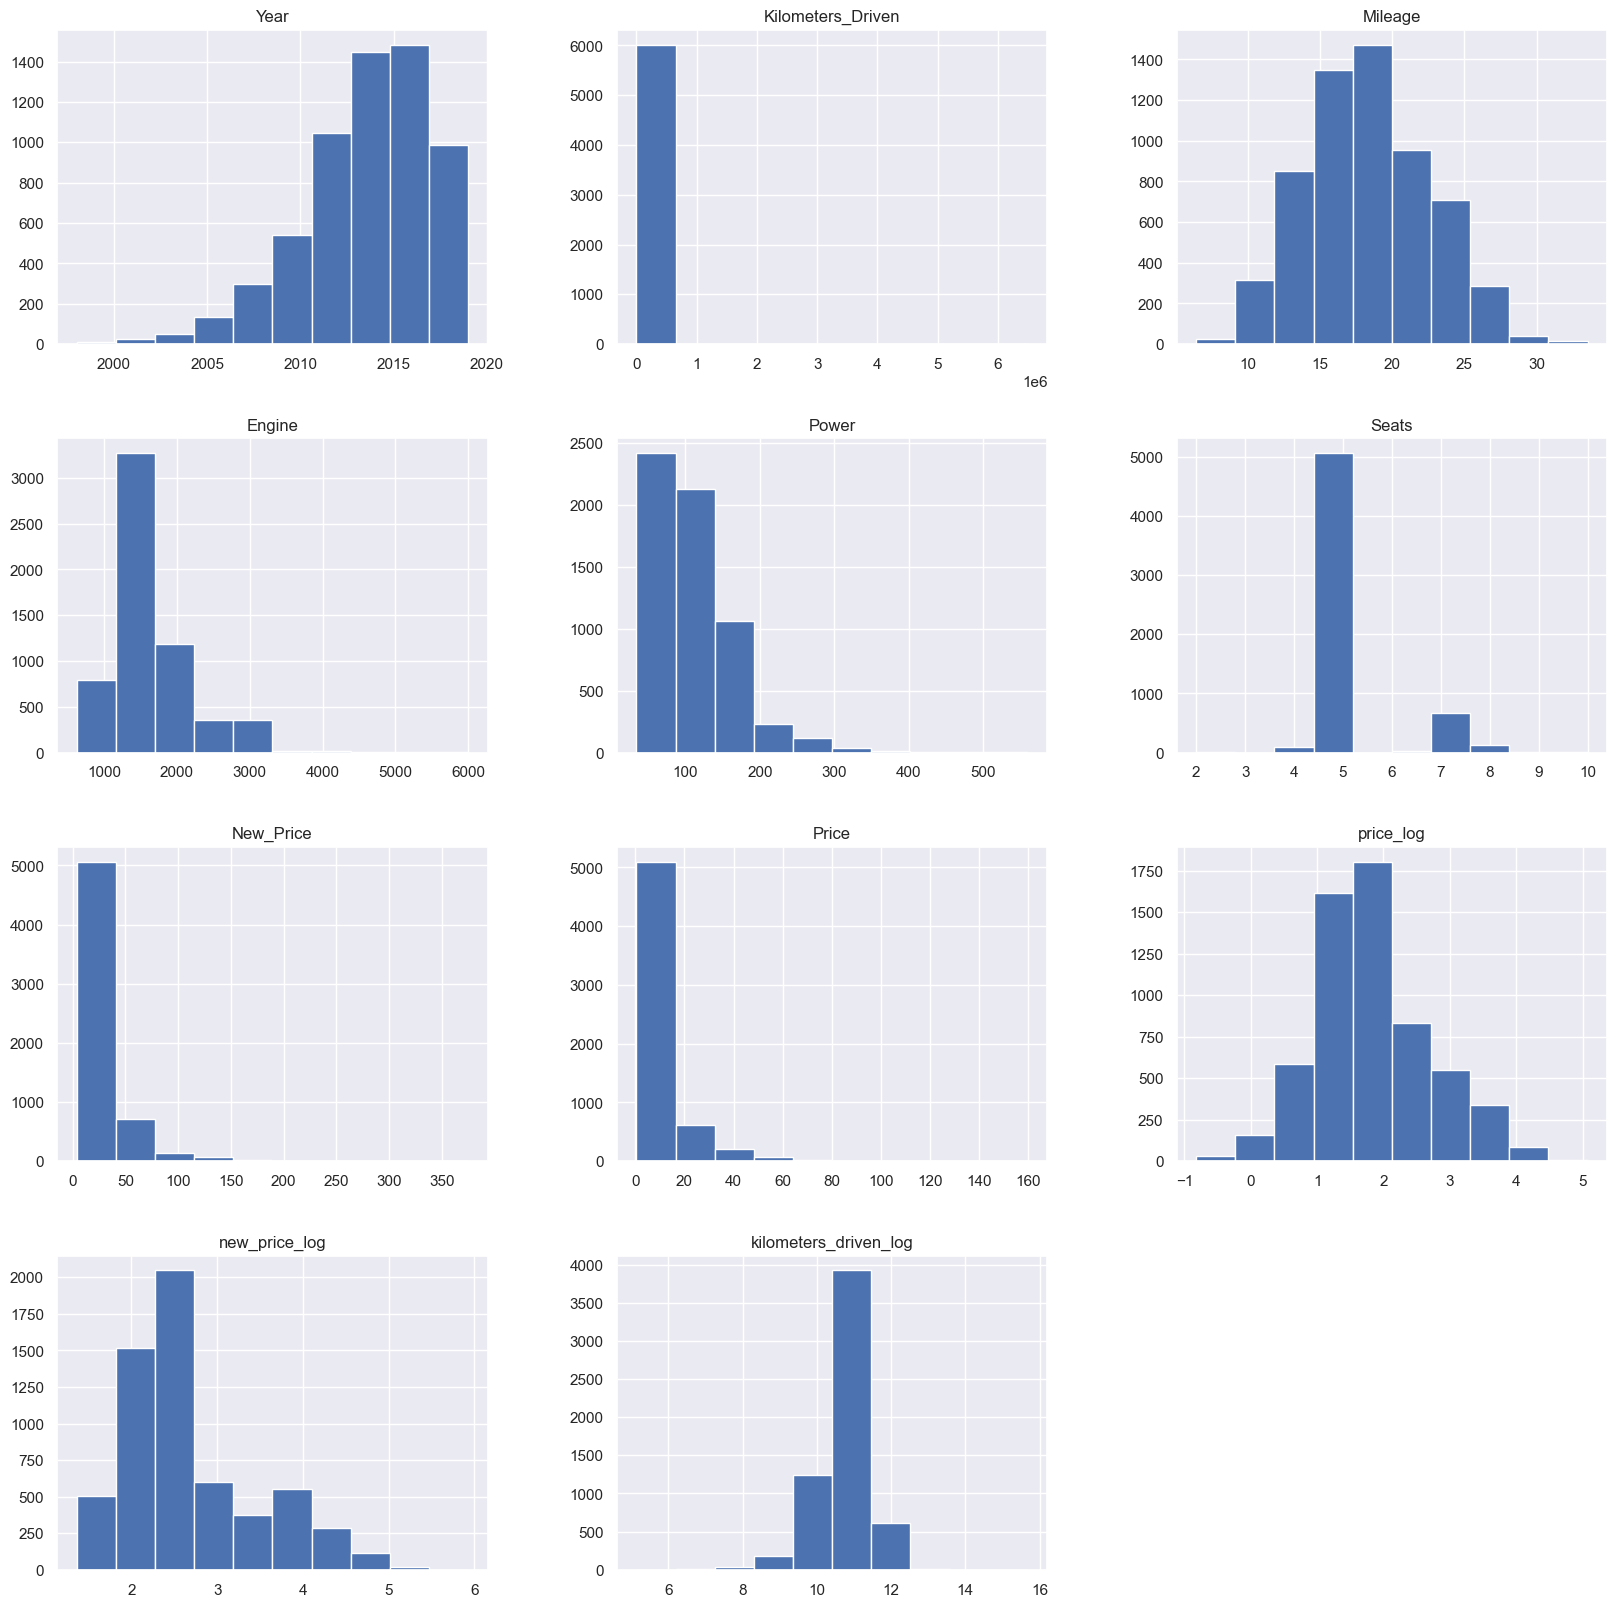

In [54]:
df.hist(figsize=(20, 20))
plt.show()

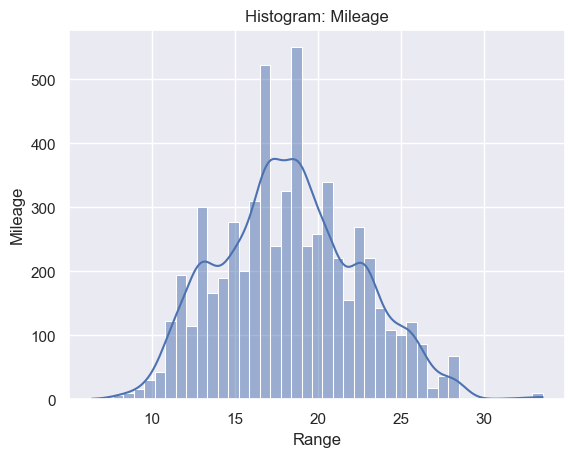

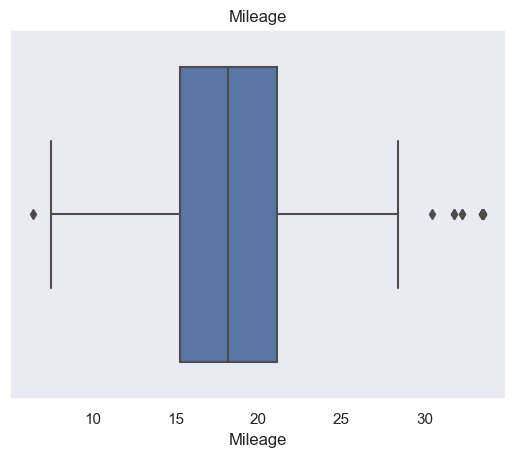

In [55]:
sns.histplot(data = df, x = 'Mileage', kde = True);
plt.title('Histogram: Mileage')
plt.xlabel('Range')
plt.ylabel('Mileage')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Mileage');
plt.title('Mileage')
plt.xlabel('Mileage')
sns.set(style="dark")
plt.show()

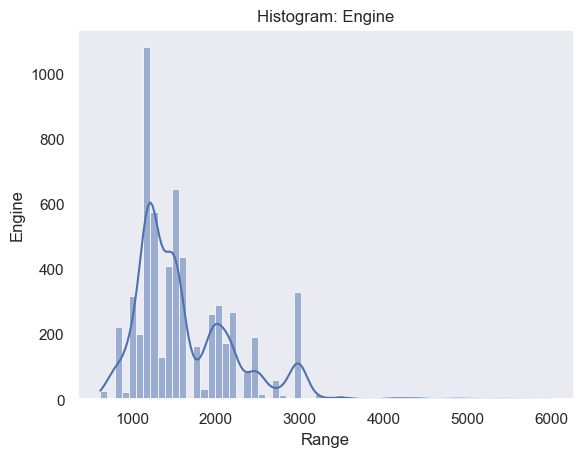

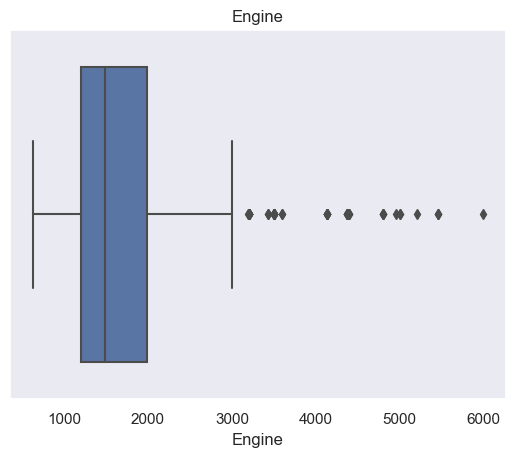

In [56]:
sns.histplot(data = df, x = 'Engine', kde = True);
plt.title('Histogram: Engine')
plt.xlabel('Range')
plt.ylabel('Engine')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Engine');
plt.title('Engine')
plt.xlabel('Engine')
sns.set(style="dark")
plt.show()

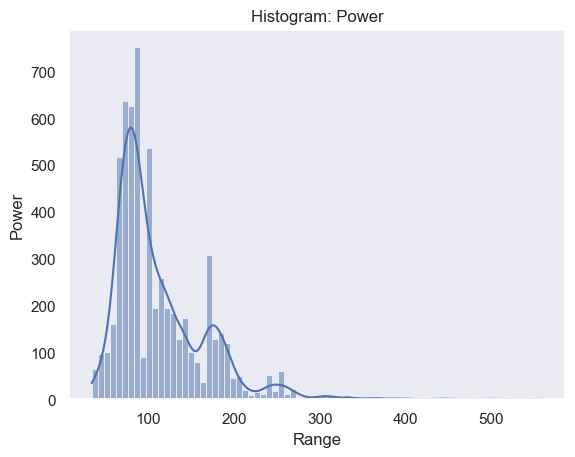

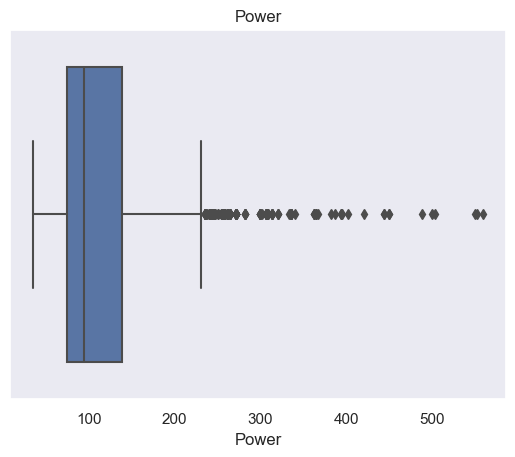

In [57]:
sns.histplot(data = df, x = 'Power', kde = True);
plt.title('Histogram: Power')
plt.xlabel('Range')
plt.ylabel('Power')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Power');
plt.title('Power')
plt.xlabel('Power')
sns.set(style="dark")
plt.show()

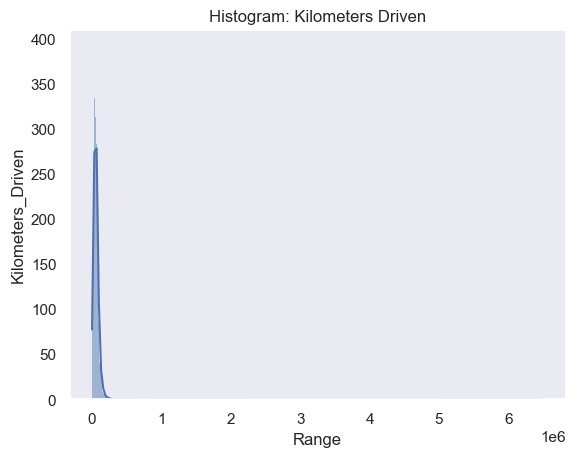

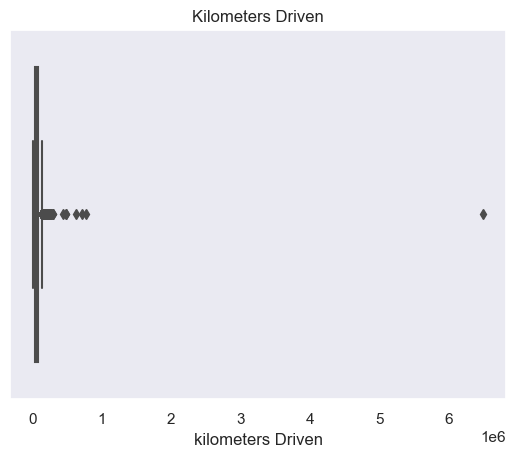

In [58]:
sns.histplot(data = df, x = 'Kilometers_Driven', kde = True);
plt.title('Histogram: Kilometers Driven')
plt.xlabel('Range')
plt.ylabel('Kilometers_Driven')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Kilometers_Driven');
plt.title('Kilometers Driven')
plt.xlabel('kilometers Driven')
sns.set(style="dark")
plt.show()

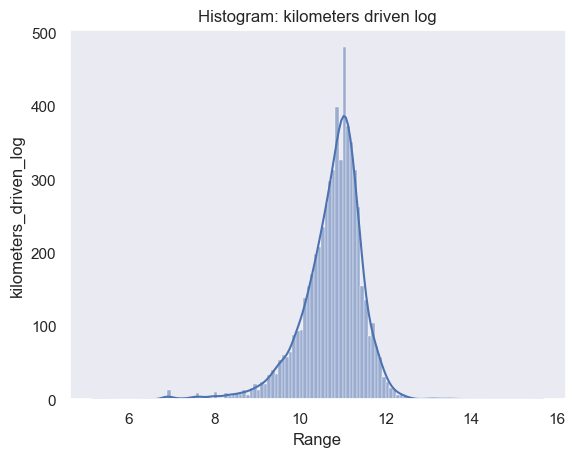

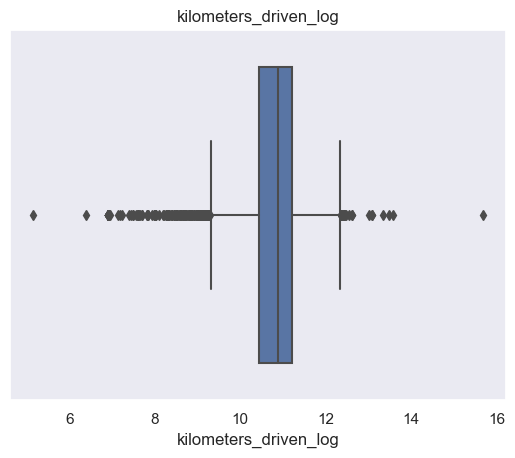

In [59]:
sns.histplot(data = df, x = 'kilometers_driven_log', kde = True);
plt.title('Histogram: kilometers driven log')
plt.xlabel('Range')
plt.ylabel('kilometers_driven_log')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'kilometers_driven_log');
plt.title('kilometers_driven_log')
plt.xlabel('kilometers_driven_log')
sns.set(style="dark")
plt.show()

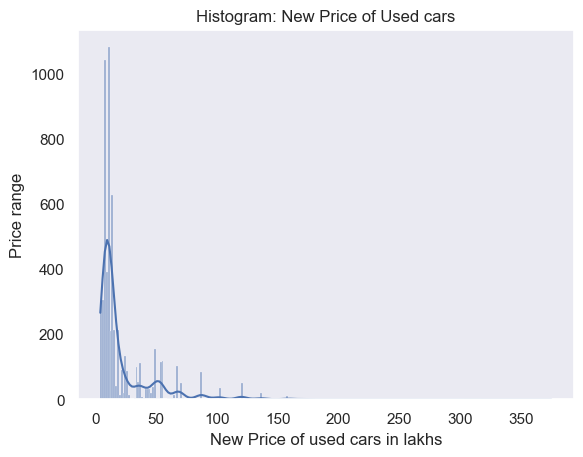

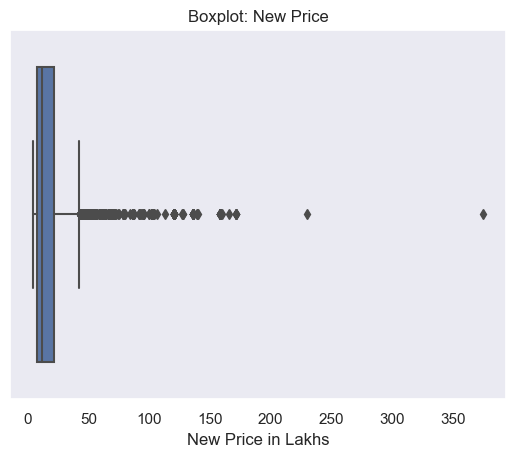

In [60]:
sns.histplot(data = df, x = 'New_Price', kde = True);
plt.title('Histogram: New Price of Used cars')
plt.xlabel('New Price of used cars in lakhs')
plt.ylabel('Price range')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'New_Price');
plt.title('Boxplot: New Price')
plt.xlabel('New Price in Lakhs')
sns.set(style="dark")
plt.show()

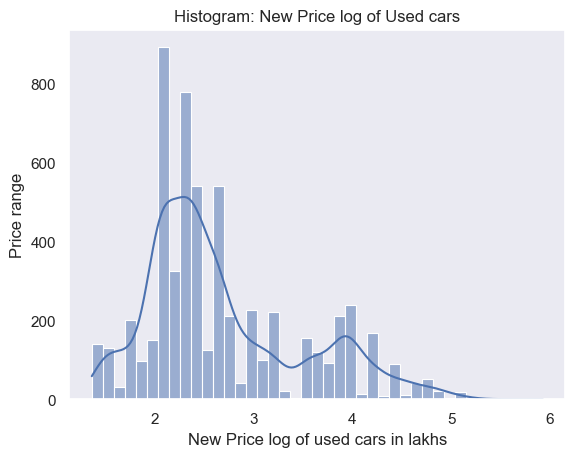

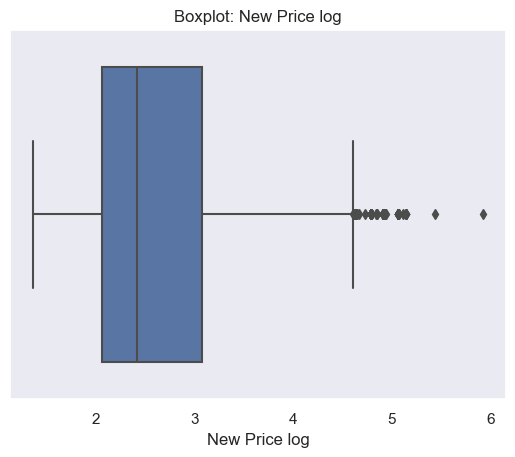

In [61]:
sns.histplot(data = df, x = 'new_price_log', kde = True);
plt.title('Histogram: New Price log of Used cars')
plt.xlabel('New Price log of used cars in lakhs')
plt.ylabel('Price range')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'new_price_log');
plt.title('Boxplot: New Price log')
plt.xlabel('New Price log')
sns.set(style="dark")
plt.show()

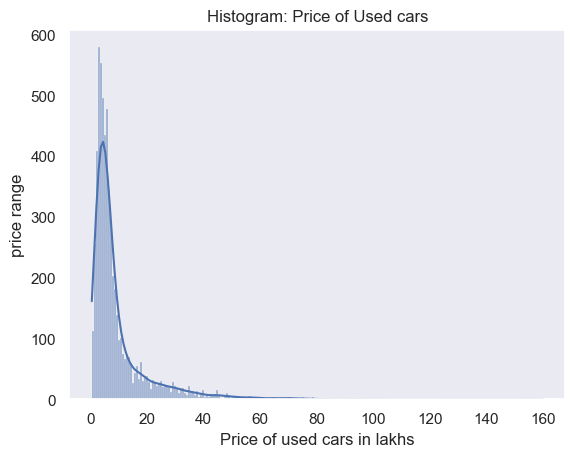

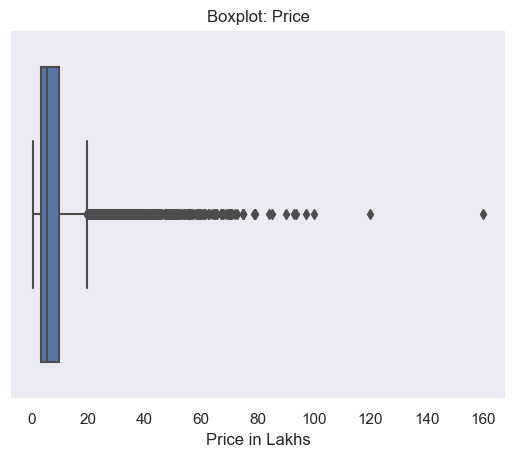

In [62]:
sns.histplot(data = df, x = 'Price', kde = True);
plt.title('Histogram: Price of Used cars')
plt.xlabel('Price of used cars in lakhs')
plt.ylabel('price range')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Price');
plt.title('Boxplot: Price')
plt.xlabel('Price in Lakhs')
sns.set(style="dark")
plt.show()

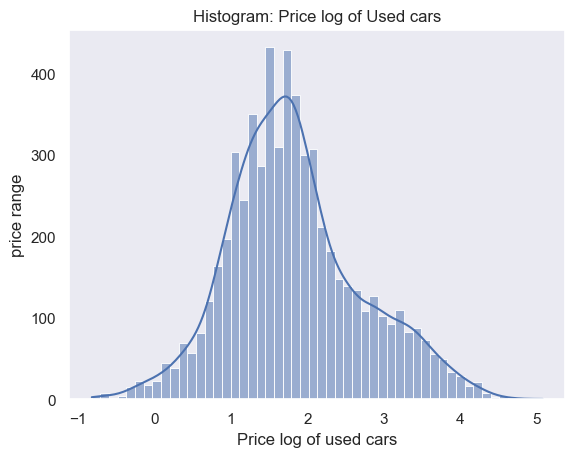

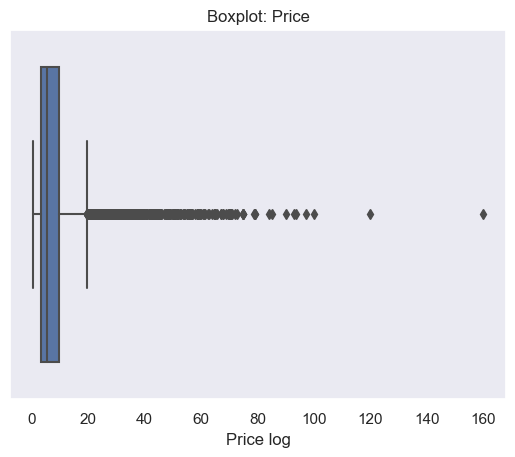

In [63]:
sns.histplot(data = df, x = 'price_log', kde = True);
plt.title('Histogram: Price log of Used cars')
plt.xlabel('Price log of used cars')
plt.ylabel('price range')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Price');
plt.title('Boxplot: Price')
plt.xlabel('Price log')
sns.set(style="dark")
plt.show()

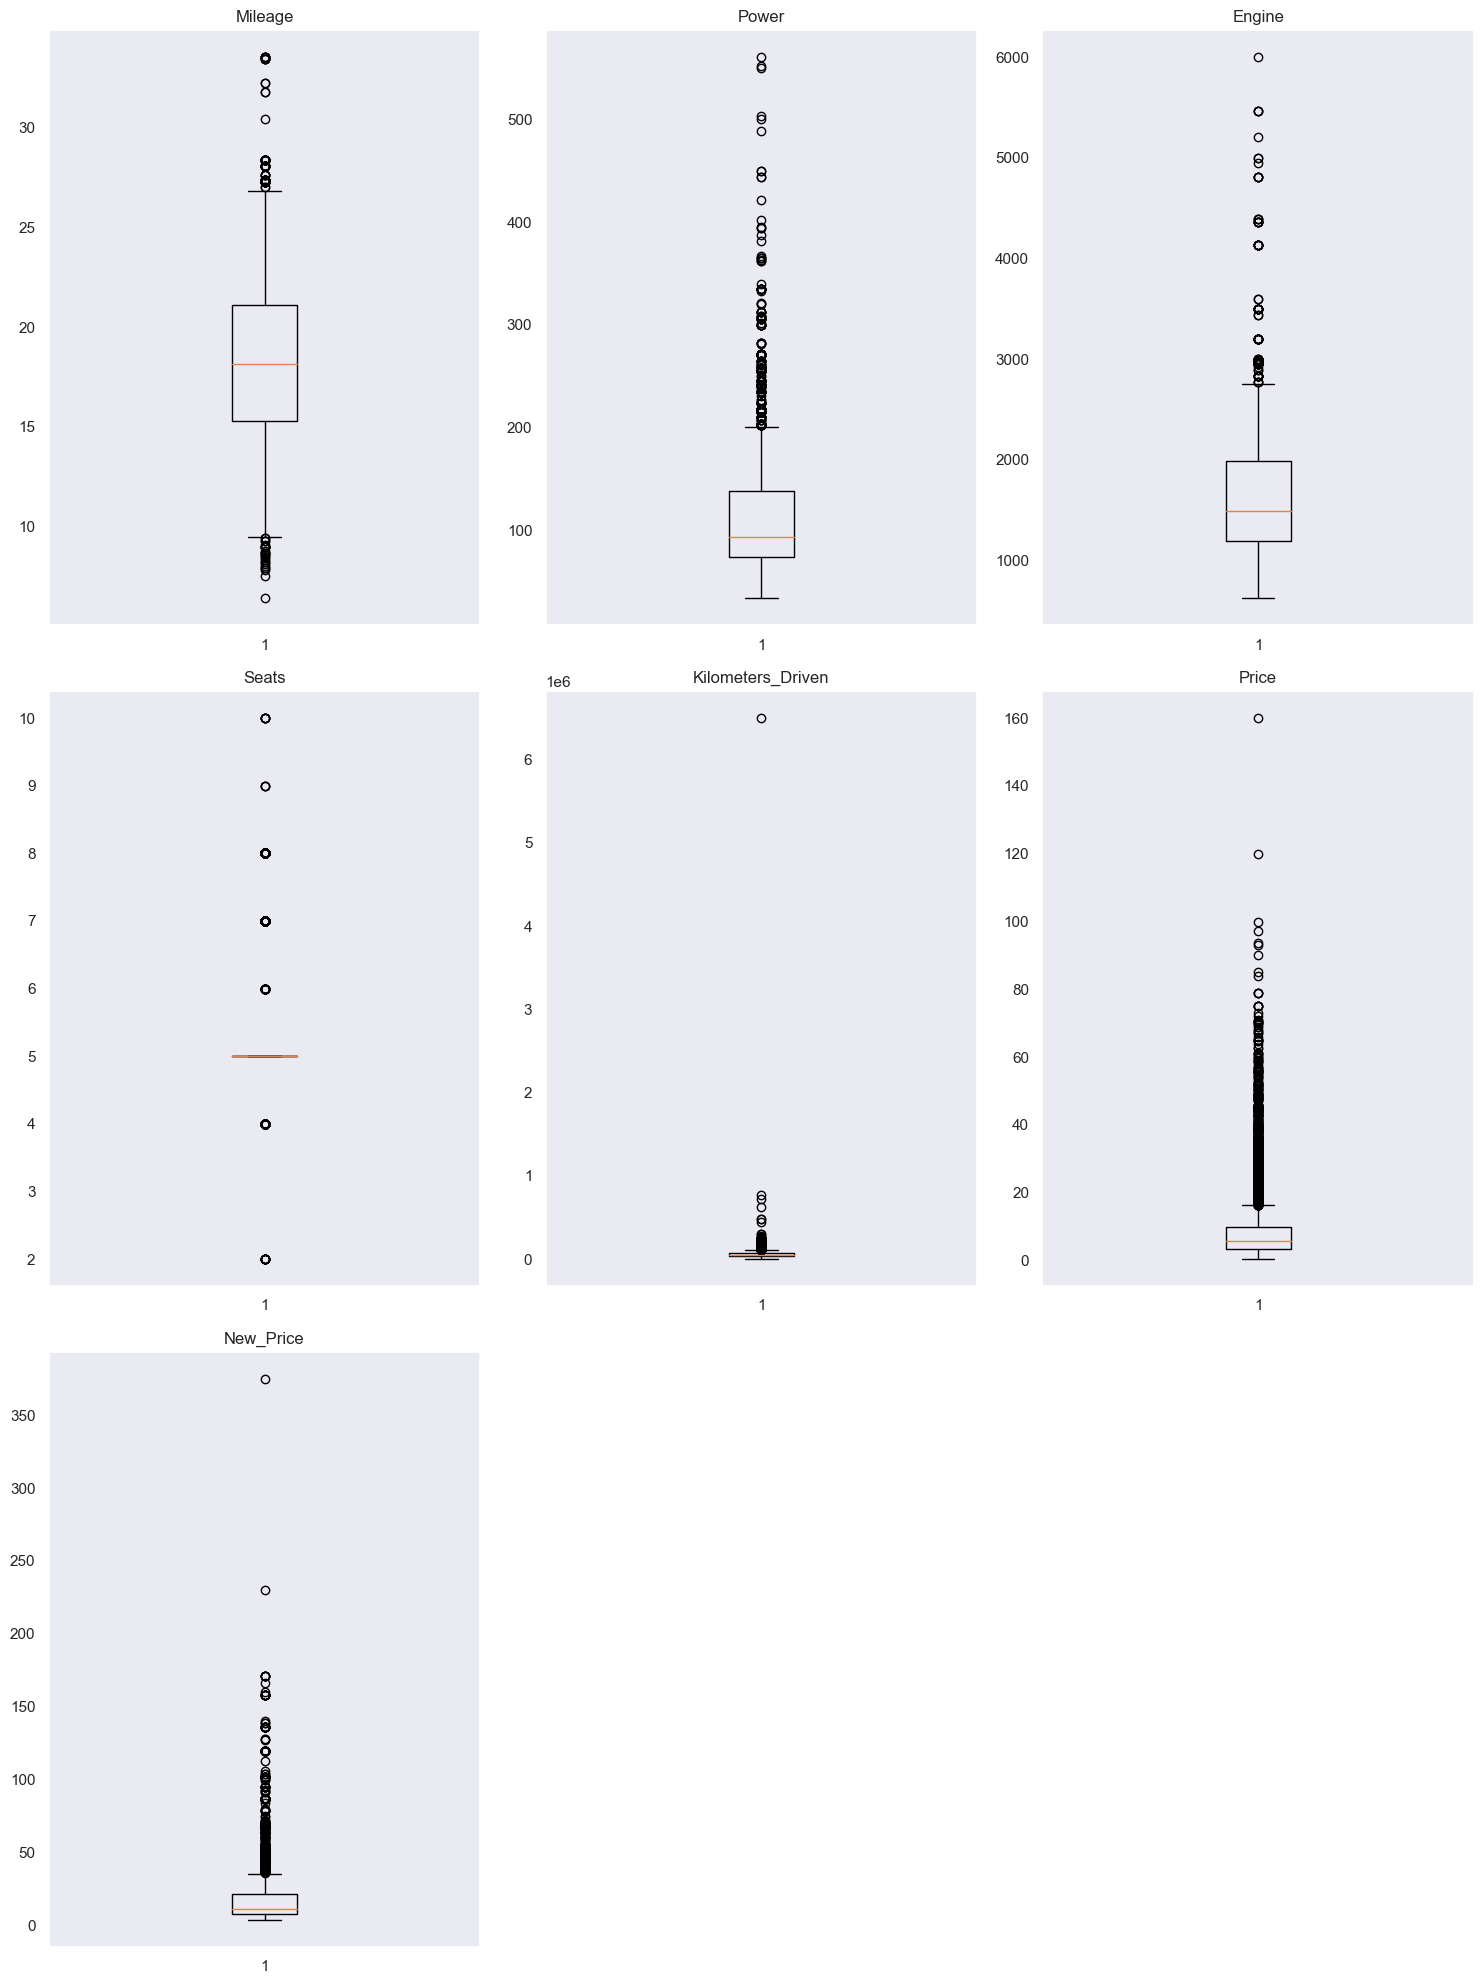

In [64]:
# creating boxplots for all numerical variables using for loop
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Mileage', 'Power', 'Engine', 'Seats', 'Kilometers_Driven', 'Price', 'New_Price']
plt.figure(figsize=(15, 20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1)
    plt.tight_layout()
    plt.title(variable)

plt.show()

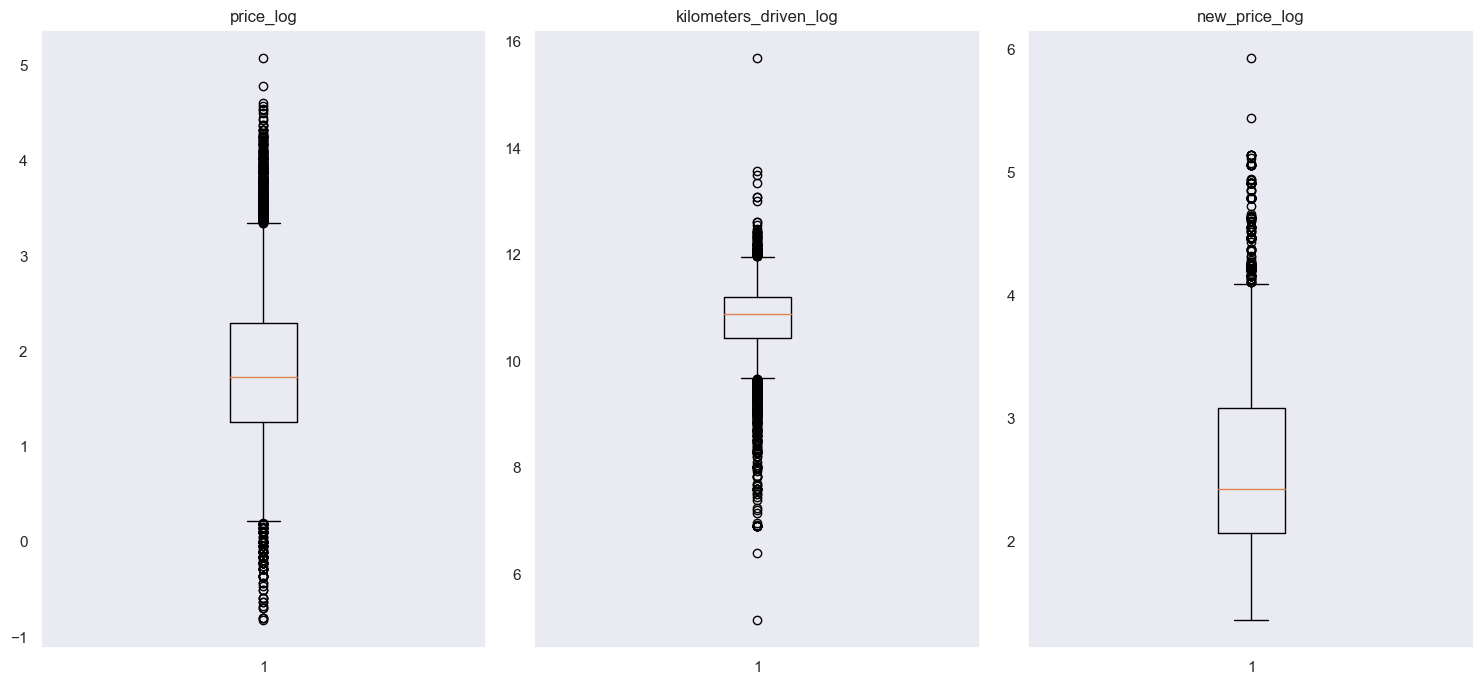

In [65]:
# creating boxplots for all numerical variables using for loop
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['price_log', 'kilometers_driven_log', 'new_price_log']
plt.figure(figsize=(15, 20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1)
    plt.tight_layout()
    plt.title(variable)

plt.show()

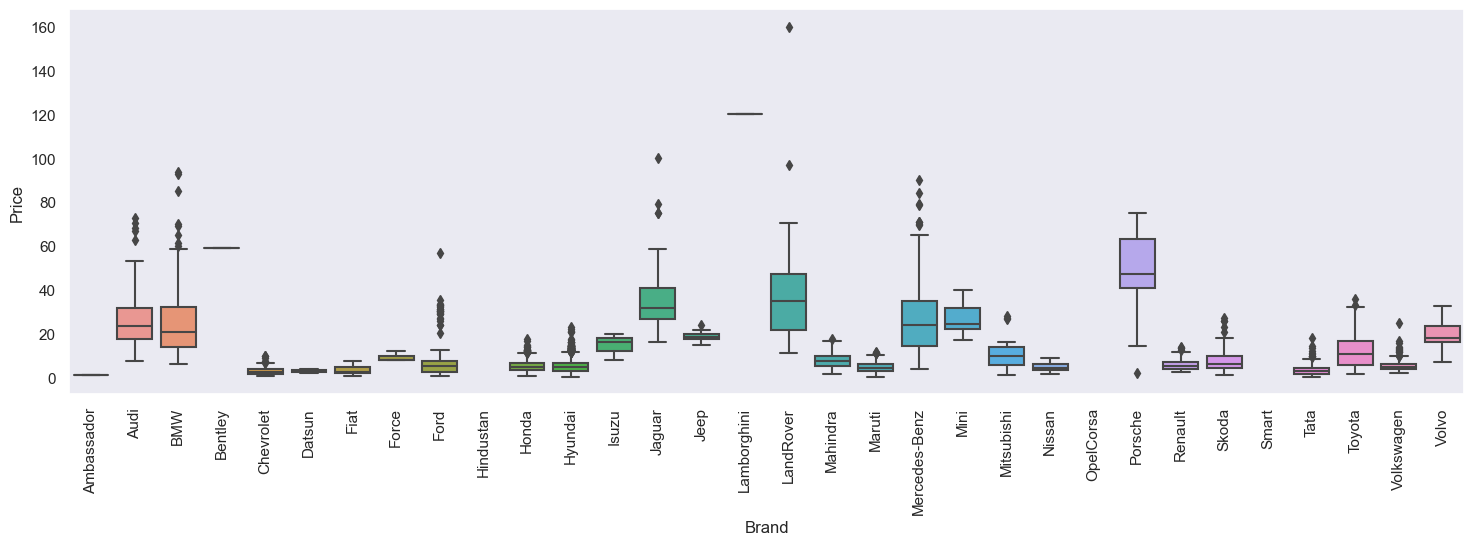

In [66]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

**Bivariate Analysis**

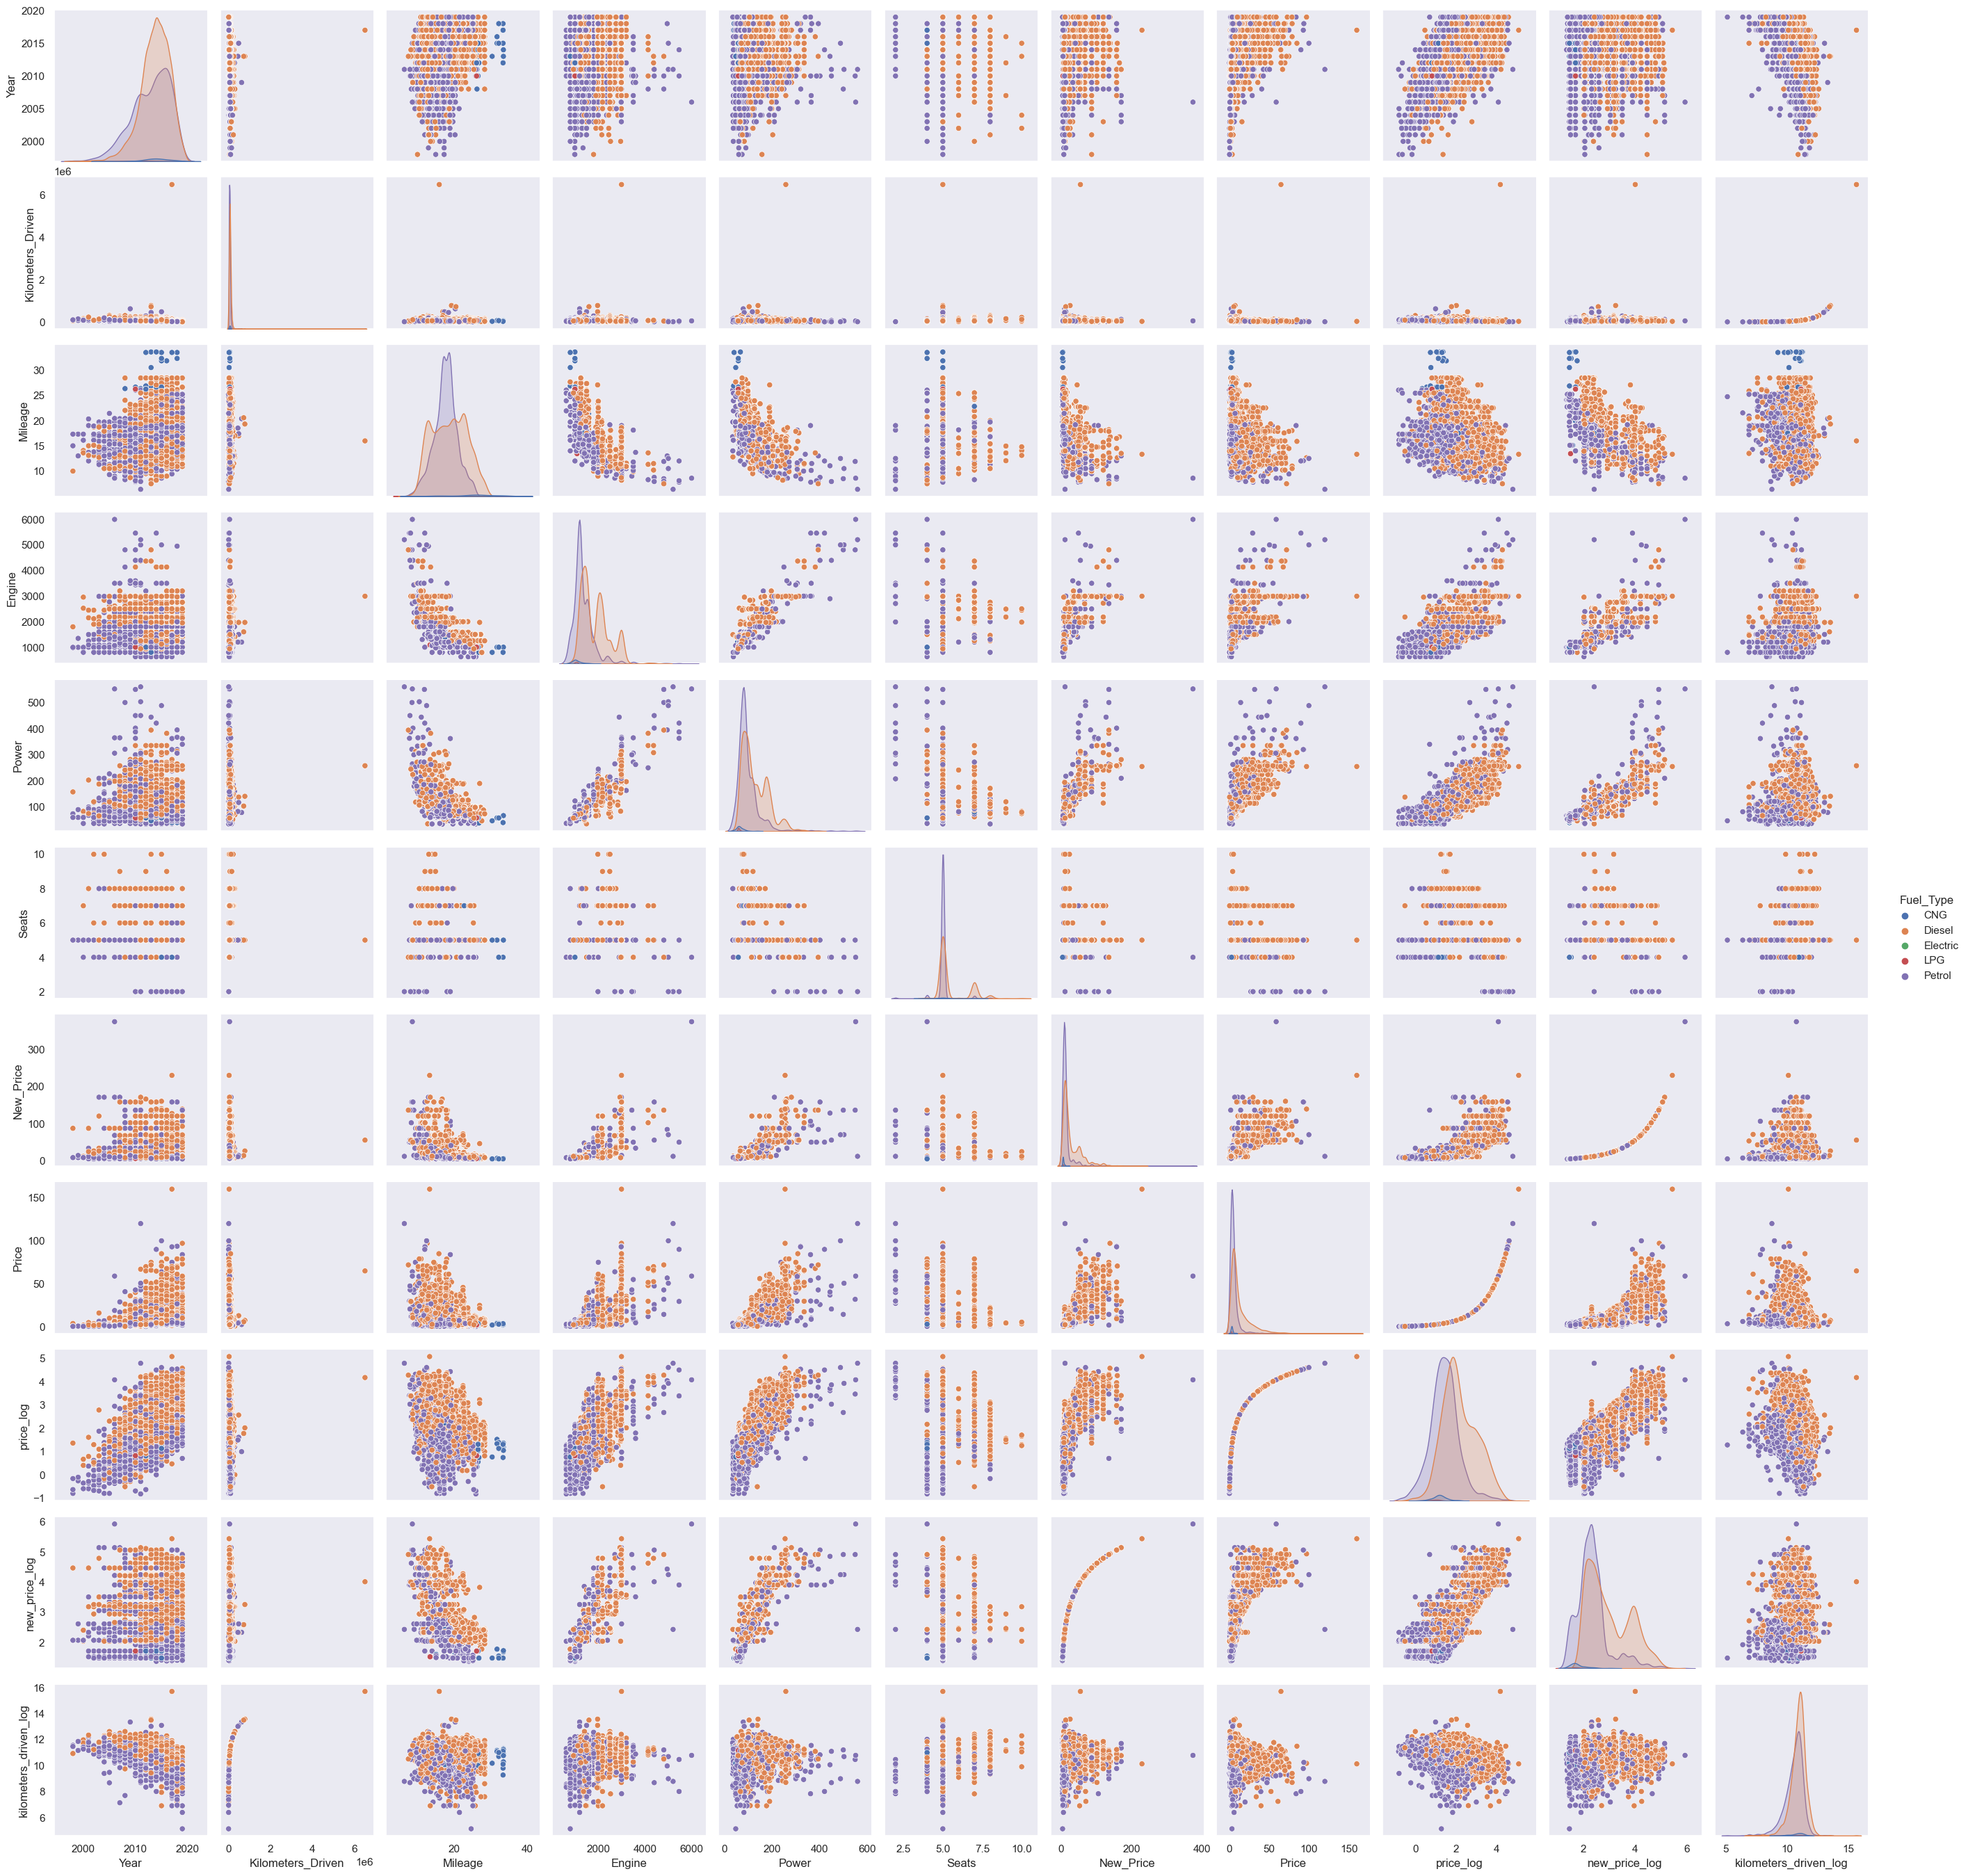

In [67]:
sns.pairplot(data=df, hue="Fuel_Type")
plt.show()

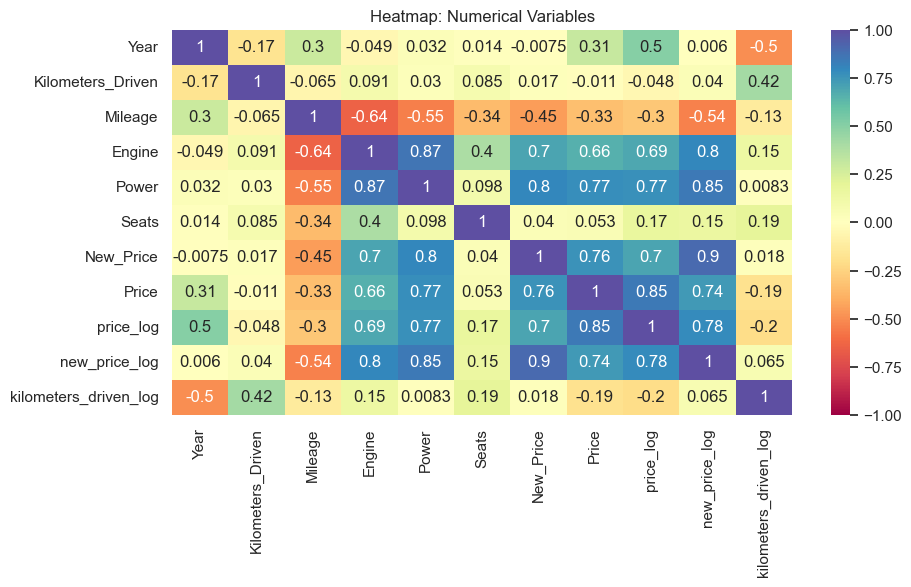

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title('Heatmap: Numerical Variables')  
plt.show();

**Inferences**

* Price has highest +ve corelation with Engine and Power variables. Mileage has -ve corelation with Price
* There will be multi-colinearity when we build model for price as there is corelationship between various x variables such 

## Linear Model Building

In [69]:
X = df.drop(["Price", "price_log"], axis=1)
y = df["Price"]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6016 non-null   category
 1   Year                   6016 non-null   int64   
 2   Kilometers_Driven      6016 non-null   int64   
 3   Fuel_Type              6016 non-null   category
 4   Transmission           6016 non-null   category
 5   Owner_Type             6016 non-null   category
 6   Mileage                6016 non-null   float64 
 7   Engine                 6016 non-null   float64 
 8   Power                  6016 non-null   float64 
 9   Seats                  6016 non-null   float64 
 10  New_Price              6016 non-null   float64 
 11  Price                  6016 non-null   float64 
 12  Brand                  6016 non-null   category
 13  Model                  6016 non-null   category
 14  price_log              6016 non-null   f

In [71]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

Year  Kilometers_Driven  Mileage   Engine   Power  Seats  New_Price  \
0  2010              72000   26.600  998.000  58.160  5.000      5.510   
1  2015              41000   19.670 1582.000 126.200  5.000     16.060   
2  2011              46000   18.200 1199.000  88.700  5.000      8.610   
3  2012              87000   20.770 1248.000  88.760  7.000     11.270   
4  2013              40670   15.200 1968.000 140.800  5.000     53.140   

   new_price_log  kilometers_driven_log  Location_Bangalore  Location_Chennai  \
0          1.707                 11.184                   0                 0   
1          2.776                 10.621                   0                 0   
2          2.153                 10.736                   0                 1   
3          2.422                 11.374                   0                 1   
4          3.973                 10.613                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0                 0                   0              0                 0   
1                 1                   0              0                 0   
2                 0                   0              0                 1   
3                 1                   0              0                 0   
4                 1                   0              0                 0   

   Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
0                    1                          0                  0   
1                    1                          0                  0   
2                    1                          0                  0   
3                    1                          0                  0   
4                    0                          0                  1   

   Owner_Type_Third  Brand_Audi  Brand_BMW  Brand_Bentley  Brand_Chevrolet  \
0                 0           0          0              0                0   
1                 0           0          0              0                0   
2                 0           0          0              0                0   
3                 0           0          0              0                0   
4                 0           1          0              0                0   

   Brand_Datsun  Brand_Fiat  Brand_Force  Brand_Ford  Brand_Hindustan  \
0             0           0            0           0                0   
1             0           0            0           0                0   
2             0           0            0           0                0   
3             0           0            0           0                0   
4             0           0            0           0                0   

   Brand_Honda  Brand_Hyundai  Brand_Isuzu  Brand_Jaguar  Brand_Jeep  \
0            0              0            0             0           0   
1            0              1            0             0           0   
2            1              0            0             0           0   
3            0              0            0             0           0   
4          

In [72]:
# split the data in 70:30 ratio for train data vs test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
print(f' There are a total of {x_train.shape[0]} rows in train data.')
print(f' There are a total of {x_test.shape[0]} rows in test data.')

 There are a total of 4211 rows in train data.
 There are a total of 1805 rows in test data.


In [74]:
# fitting a linear model
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [75]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    This function to calculate MODEL PREDICTORS TARGET
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [76]:
# Checking model performance on train set
print("Training Performance:")
model1_perf_train = model_performance_regression(model1, x_train, y_train)
model1_perf_train

Training Performance:


RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 3.904 2.218      0.880           0.872 42.451

**Model performance on the test data**

In [77]:
# model performance on test set
print("Test Performance:")
model1_perf_test = model_performance_regression(model1, x_test, y_test)
model1_perf_test

Test Performance:


RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 5.371 2.479      0.761           0.717 43.376

**Inferences**

* This model is an Overfit Model. As the Performance Train > Performance Test
* Test Root Mean Square Error (5.371 Lakh Rupees) > Mean Absolute Error (4.479 Lakh Rupee) suggests that the Outliers are skewing the model performance 
* Model is able to explain 71.7% of the varience
* Model is able to predict used car Prices upto ≈ 43.5%   

**Log Tranformations**

In [78]:
# defining the dependent and independent variables
X = df.drop(["Price", "price_log"], axis=1)
y = df["price_log"]

In [79]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [80]:
# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [81]:

print(f' There are a total of {x_train2.shape[0]} rows in train data.')
print(f' There are a total of {x_test2.shape[0]} rows in test data.')

 There are a total of 4211 rows in train data.
 There are a total of 1805 rows in test data.


In [82]:
# fitting a linear model
model2 = LinearRegression()
model2.fit(x_train2, y_train)

LinearRegression()

In [83]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [84]:
# Checking model performance on train set
print("Training Performance:")
model2_perf_train = model_performance_regression(model2, x_train2, y_train)
model2_perf_train

Training Performance:


RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 2.640 1.167      0.945           0.941 12.738

In [85]:
# Checking model performance on test set
print("Test Performance:")
model2_perf_test = model_performance_regression(model2, x_test2, y_test)
model2_perf_test

Test Performance:


RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 3.944 1.345      0.871           0.848 13.694

**Inferences**

* This model is an Overfit Model. As the Performance Train > Performance Test
* Test Root Mean Square Error (3.944 Lakh Rupees) > Mean Absolute Error (1.345 Lakh Rupee) suggests that the Outliers are skewing the model performance  
* Model is able to explain 84.8% of the varience
* Model is able to predict used car Prices upto ≈ 13.7%   

In [86]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model1_perf_train.T,
        model2_perf_train.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression (Price)  Linear Regression (price_log)
RMSE                                3.904                          2.640
MAE                                 2.218                          1.167
R-squared                           0.880                          0.945
Adj. R-squared                      0.872                          0.941
MAPE                               42.451                         12.738

In [87]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        model1_perf_test.T,
        model2_perf_test.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Linear Regression (Price)  Linear Regression (price_log)
RMSE                                5.371                          3.944
MAE                                 2.479                          1.345
R-squared                           0.761                          0.871
Adj. R-squared                      0.717                          0.848
MAPE                               43.376                         13.694

**Sequential Feature Selector**

In [88]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train2.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train2, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 276 out of 276 | elapsed:    2.5s finished

[2022-12-24 18:19:08] Features: 1/276 -- score: 0.6139329604929121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:    0.2s finished

[2022-12-24 18:19:09] Features: 2/276 -- score: 0.860075759530603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 274 out of 274 | elapsed:    0.2s finished

[2022-12-24 18:19:09] Features: 3/276 -- score: 0.8881874735959135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished

[2022-12-24 18:19:23] Features: 27/276 -- score: 0.9367150966287265[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:    0.5s finished

[2022-12-24 18:19:24] Features: 28/276 -- score: 0.9372902319823421[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 217 out of 248 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:    0.6s finished

[2022-12-24 18:19:25] Features: 29/276 -- score: 0.9377637816381185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:    0.6s finished

[2022-12-24 1

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    1.0s finished

[2022-12-24 18:19:49] Features: 53/276 -- score: 0.9455073086927562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 out of 223 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    1.0s finished

[2022-12-24 18:19:50] Features: 54/276 -- score: 0.9456772219581389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 191 out of 222 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    1.0s finished

[2022-12-24 18:19:51] Features: 55/276 -- score: 0.9458506985229569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Par

[Parallel(n_jobs=-1)]: Done 168 out of 199 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    1.3s finished

[2022-12-24 18:20:23] Features: 78/276 -- score: 0.9489200600578306[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    1.3s finished

[2022-12-24 18:20:25] Features: 79/276 -- score: 0.9490039401548674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 166 out of 197 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    1.3s finished

[2022-12-24 18:20:26] Features: 80/276 -- score: 0.9490840100036191[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Par

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 142 out of 173 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    1.6s finished

[2022-12-24 18:21:08] Features: 104/276 -- score: 0.9501140036207948[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    1.7s finished

[2022-12-24 18:21:10] Features: 105/276 -- score: 0.9501419059138559[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 171 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    1.7s finished

[2022-12-24 18:21:12] Features: 106/276 -- score: 0.950164279420218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[P

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 116 out of 147 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    2.2s finished

[2022-12-24 18:22:01] Features: 130/276 -- score: 0.9511860208538334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    1.9s finished

[2022-12-24 18:22:03] Features: 131/276 -- score: 0.9512235480818283[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 114 out of 145 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    1.9s finished

[2022-12-24 18:22:05] Features: 132/276 -- score: 0.9512640466379727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[

[Parallel(n_jobs=-1)]: Done  90 out of 121 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    2.1s finished

[2022-12-24 18:22:59] Features: 156/276 -- score: 0.9518042932481782[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished

[2022-12-24 18:23:02] Features: 157/276 -- score: 0.9518092006173637[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    2.1s finished

[2022-12-24 18:23:04] Features: 158/276 -- score: 0.9518132667842011[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    2.1s finished

[2022-12-2

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    2.2s finished

[2022-12-24 18:24:11] Features: 186/276 -- score: 0.9518546385507571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.2s finished

[2022-12-24 18:24:14] Features: 187/276 -- score: 0.9518546141905994[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    2.2s finished

[2022-12-24 18:24:16] Features: 188/276 -- score: 0.9518616175238319[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    2.2s finished

[2022-12-24 18:24:19] Feature

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.9s finished

[2022-12-24 18:25:21] Features: 216/276 -- score: 0.9516708502355312[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished

[2022-12-24 18:25:23] Features: 217/276 -- score: 0.9516709877998073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.9s finished

[2022-12-24 18:25:25] Features: 218/276 -- score: 0.9516667733106828[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[

[Parallel(n_jobs=-1)]: Done  25 out of  37 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.5s finished

[2022-12-24 18:26:07] Features: 240/276 -- score: 0.9512402139958187[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished

[2022-12-24 18:26:08] Features: 241/276 -- score: 0.9512015136343009[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    1.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.4s finished

[2022-12-24 18:26:10] Features: 242/276 -- score: 0.9511593233330042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Do


[2022-12-24 18:26:36] Features: 265/276 -- score: 0.9493868522666679[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2022-12-24 18:26:37] Features: 266/276 -- score: 0.9493334168686969[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2022-12-24 18:26:38] Features: 267/276 -- score: 0.9492667636152252[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2022-12-24 18:26:38] Features: 268/276 -- score: 0.9490804916551383[Parallel(n_jobs=-1)]: Using backend 

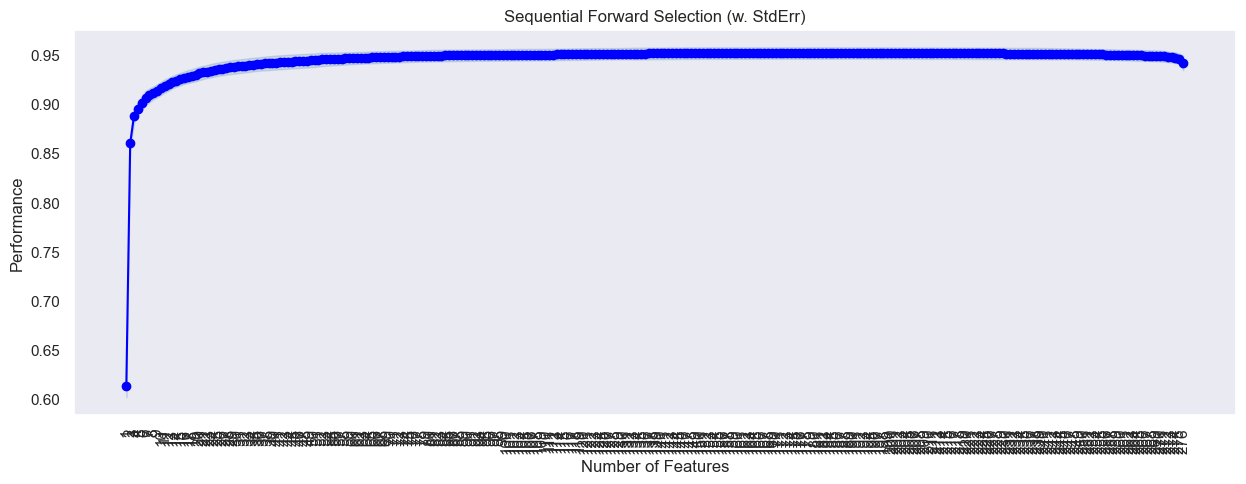

In [90]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [91]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [92]:
x_train2.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'new_price_log', 'kilometers_driven_log',
       'Location_Bangalore',
       ...
       'Model_Xcent', 'Model_Xenon', 'Model_Xylo', 'Model_Yeti', 'Model_Z4',
       'Model_Zen', 'Model_Zest', 'Model_i10', 'Model_i20', 'Model_redi-GO'],
      dtype='object', length=276)

In [93]:
x_train2_sfs = x_train2[x_train2.columns[feat_cols]]
x_test2_sfs = x_test2[x_train2_sfs.columns]

model2_sfs = LinearRegression()
model2_sfs.fit(x_train2_sfs, y_train)

LinearRegression()

In [94]:
# model performance on train set
print("Training Performance after SFS\n")
model2_sfs_train_perf = model_performance_regression(model2_sfs, x_train2_sfs, y_train)
model2_sfs_train_perf

Training Performance after SFS



RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 2.640 1.167      0.945           0.941 12.738

**Inferences**

* No significant change after using SFS as no chnage in Adjusted R2 

**Equation of the Linear Regression for Price Log**

In [95]:
Equation = "Price = " + str(model2.intercept_)
print(Equation, end=" ")

for i in range(len(x_train2.columns)):
    if i != len(x_train2.columns) - 1:
        print(
            "+ (",
            model2.coef_[i],
            ")*(",
            x_train2.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", model2.coef_[i], ")*(", x_train2.columns[i], ")")

Price = -211.14412429892397 + ( 0.10592505472590998 )*( Year )  + ( 6.061801589743111e-08 )*( Kilometers_Driven )  + ( 0.0008098884667282237 )*( Mileage )  + ( -8.195407526588941e-05 )*( Engine )  + ( 0.003057107271840817 )*( Power )  + ( 0.0010443006903462781 )*( Seats )  + ( -0.0019100007541268116 )*( New_Price )  + ( 0.24172000979190156 )*( new_price_log )  + ( -0.07811054546188691 )*( kilometers_driven_log )  + ( 0.16586626456404832 )*( Location_Bangalore )  + ( 0.05006386009781699 )*( Location_Chennai )  + ( 0.13660684611798382 )*( Location_Coimbatore )  + ( -0.09123767876561281 )*( Location_Delhi )  + ( 0.1425497914004505 )*( Location_Hyderabad )  + ( -0.03524890568259248 )*( Location_Jaipur )  + ( -0.02126543969632466 )*( Location_Kochi )  + ( -0.22457663181551138 )*( Location_Kolkata )  + ( -0.07300772771213301 )*( Location_Mumbai )  + ( -0.036397378832255134 )*( Location_Pune )  + ( 0.06601182513667093 )*( Fuel_Type_Diesel )  + ( -1.279670813758571e-12 )*( Fuel_Type_Electric )